# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"
cities_df = pd.read_csv(output_data_file)
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [8]:
cities_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

638

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
response

{'coord': {'lon': 27.9116, 'lat': -33.0153},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 77,
  'feels_like': 80.83,
  'temp_min': 77,
  'temp_max': 77,
  'pressure': 1004,
  'humidity': 83},
 'visibility': 10000,
 'wind': {'speed': 8.05, 'deg': 210},
 'clouds': {'all': 75},
 'dt': 1612111859,
 'sys': {'type': 1,
  'id': 1912,
  'country': 'ZA',
  'sunrise': 1612063839,
  'sunset': 1612113169},
 'timezone': 7200,
 'id': 1006984,
 'name': 'East London',
 'cod': 200}

In [78]:
# url for API call
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# weather lists
city_id = -1
city_id_list = []
cities_list = []
cloudiness = []
country = []
date_time = []
humidity = []
lat = []
lng = []
temp_max = []
wind_speed = []
# counters
missing = 0

for city in cities[:50]:
    city_id += 1
    try:
        print(f"Retrieving Results for Index {city_id}: {city}.")
        response = requests.get(query_url+city).json()
        cities_list.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date_time.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp_max.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        city_id_list.append(city_id)
    except (KeyError, IndexError):
        print("Missing Field...skipping")
        missing += 1
        city_id -= 1
    print("-----------------------------------------------")

Retrieving Results for Index 0: barentsburg.
Missing Field...skipping
-----------------------------------------------
Retrieving Results for Index 0: puerto ayora.
-----------------------------------------------
Retrieving Results for Index 1: aksha.
-----------------------------------------------
Retrieving Results for Index 2: kurilsk.
-----------------------------------------------
Retrieving Results for Index 3: provideniya.
-----------------------------------------------
Retrieving Results for Index 4: busselton.
-----------------------------------------------
Retrieving Results for Index 5: new norfolk.
-----------------------------------------------
Retrieving Results for Index 6: saint george.
-----------------------------------------------
Retrieving Results for Index 7: severo-kurilsk.
-----------------------------------------------
Retrieving Results for Index 8: east london.
-----------------------------------------------
Retrieving Results for Index 9: husavik.
-----------

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [154]:
weather_df = pd.DataFrame({"City_ID": city_id_list,
                           "City": cities_list,
                           "Country": country,
                           "Cloudiness": cloudiness,
                           "Date": date_time,
                           "Humidity(%)": humidity,
                           "Lat": lat,
                           "Lng": lng,
                           "Max Temp (F)": temp_max,
                           "Wind Speed": wind_speed
                          })
weather_df["Date"]= pd.to_datetime(weather_df["Date"], unit="s").dt.date
weather_df.head()

,City_ID,City,Country,Cloudiness,Date,Humidity(%),Lat,Lng,Max Temp (F),Wind Speed
0,0,Puerto Ayora,EC,0,2021-01-31,70,-0.7393,-90.3518,84.20,8.05
1,1,Aksha,RU,2,2021-01-31,77,50.2814,113.2867,-17.73,10.69
2,2,Kuril'sk,RU,100,2021-01-31,93,45.2333,147.8833,17.49,22.77
3,3,Provideniya,RU,100,2021-01-31,87,64.3833,-173.3000,-7.55,23.80
4,4,Busselton,AU,0,2021-01-31,81,-33.6500,115.3333,63.00,1.01


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [164]:
#  Get the indices of cities that have humidity over 100%.
weather_df.sort_values(by="Cloudiness", ascending=True).head()

,City_ID,City,Country,Cloudiness,Date,Humidity(%),Lat,Lng,Max Temp (F),Wind Speed
0,0,Puerto Ayora,EC,0,2021-01-31,70,-0.7393,-90.3518,84.20,8.05
30,30,Jumla,NP,0,2021-01-31,73,29.2747,82.1838,33.03,3.38
28,28,Maple Creek,CA,0,2021-01-31,60,49.9168,-109.4848,37.40,8.05
9,9,Husavik,IS,0,2021-01-31,78,66.0449,-17.3389,6.80,2.30
8,8,East London,ZA,0,2021-01-31,88,-33.0153,27.9116,73.40,3.44


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

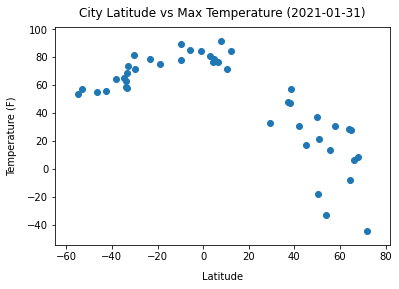

In [171]:
plt.scatter(lat,temp_max)
date = weather_df["Date"][0]
# date_format = format()
# labels
plt.title(f"City Latitude vs Max Temperature ({date})", y=1.02)
plt.xlabel("Latitude", labelpad=10)
plt.ylabel("Temperature (F)",labelpad=10)
# x & y limits
plt.ylim(min(temp_max)-10,max(temp_max)+10)
plt.xlim(min(lat)-10,max(lat)+10)
plt.show()

## Latitude vs. Humidity Plot

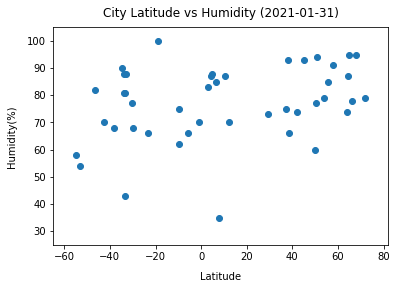

In [146]:
plt.scatter(lat,humidity)
# labels
plt.title(f"City Latitude vs Humidity ({date})", y=1.02)
plt.xlabel("Latitude", labelpad=10)
plt.ylabel("Humidity(%)",labelpad=10)
# x & y limits
plt.ylim(0,max(humidity)+5)
plt.xlim(min(lat)-10,max(lat)+10)
plt.show()

## Latitude vs. Cloudiness Plot

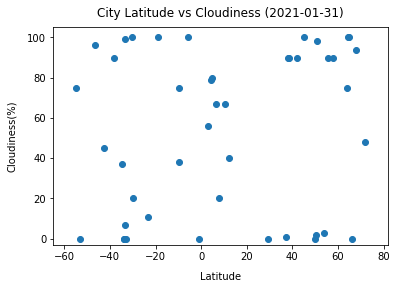

In [167]:
plt.scatter(lat,cloudiness)
# labels
plt.title(f"City Latitude vs Cloudiness ({date})", y=1.02)
plt.xlabel("Latitude", labelpad=10)
plt.ylabel("Cloudiness(%)",labelpad=10)
# x & y limits
plt.ylim(-3,max(cloudiness)+5)
plt.xlim(min(lat)-10,max(lat)+10)
plt.show()

## Latitude vs. Wind Speed Plot

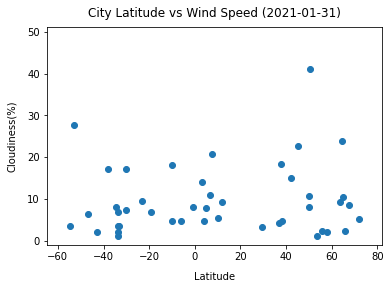

In [170]:
plt.scatter(lat,wind_speed)
# labels
plt.title(f"City Latitude vs Wind Speed ({date})", y=1.02)
plt.xlabel("Latitude", labelpad=10)
plt.ylabel("Cloudiness(%)",labelpad=10)
# x & y limits
plt.ylim(-1,max(wind_speed)+10)
plt.xlim(min(lat)-10,max(lat)+10)
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression